# Exploration du fichier source 'kc_house_data.csv' et régration linéaire

## Étape 1 : Préparation et Importation des Données

In [ ]:
# 1. Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
# 2. Charger la base de données

df = pd.read_csv("https://raw.githubusercontent.com/murpi/wilddata/master/quests/kc_house_data.csv")

In [ ]:
# 3. Aperçu initial des données :

print(df.head())  # Affiche les 5 premières lignes
print(df.info())  # Donne des informations sur les types de colonnes et les valeurs manquantes
print(df.describe())  # Statistiques descriptives basiques (numériques uniquement)

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

## Étape 2 : Inspection des Données

In [ ]:
# 1. Vérification des dimensions :

print(df.shape)  # Nombre de lignes et de colonnes

# 2. Recherche des valeurs manquantes :

print(f"Valeurs manquantes : {df.isnull().sum()}")  # Total des valeurs manquantes par colonne
print(f"Valeurs manquantes : {df.isna().sum()}")  # Total des valeurs manquantes par colonne

(21613, 21)
Valeurs manquantes : id                   0
date             21613
price                4
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64
Valeurs manquantes : id                   0
date             21613
price                4
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
sqft_living15

In [ ]:
# Visualisation :

sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()

In [ ]:
# 3. Identification des doublons :

print(df.duplicated().sum())  # Nombre de lignes dupliquées

0


In [ ]:
# 4. Analyse des types de données :

print(df.dtypes)  # Vérification des types de colonnes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [ ]:
# 5. Reformatage des colonnes au type (format) incorrect :

# Colonne(s) contenant des dates au mauvais format texte (object ou string) :

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')


# Colonne(s) catégorique mal classée comme object :

df[['view','condition','grade']] = df[['view','condition','grade']].astype('category')


# Colonne(s) de nombres mal classés comme object :

    # SI les données contiennent des séparateurs de milliers ou d'autres caractères parasites :

# df['colonne_numérique'] = df['colonne_numérique'].str.replace(',', '').astype(float) # Suppression des caractères spéciaux (comme les virgules)
# df['colonne_numérique'] = pd.to_numeric(df['colonne_numérique'], errors='coerce') # Conversion directe si aucune transformation préalable n'est nécessaire


    # SI les colonnes sont déjà bien formatées mais enregistrées comme texte :

# df['colonne_numérique'] = pd.to_numeric(df['colonne_numérique'], errors='coerce')


# Colonne(s) de booléen mal classés comme integer :

df['waterfront'] = df['waterfront'].astype('boolean')


# Colonne(s) d'identifiants mal classés comme numériques (exemple : codes postaux ou identifiants clients) :

df['id'] = df['id'].astype(str)
df['zipcode'] = df['zipcode'].astype(str)


## Étape 3 : Analyse des Variables

id
795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: count, Length: 21436, dtype: int64


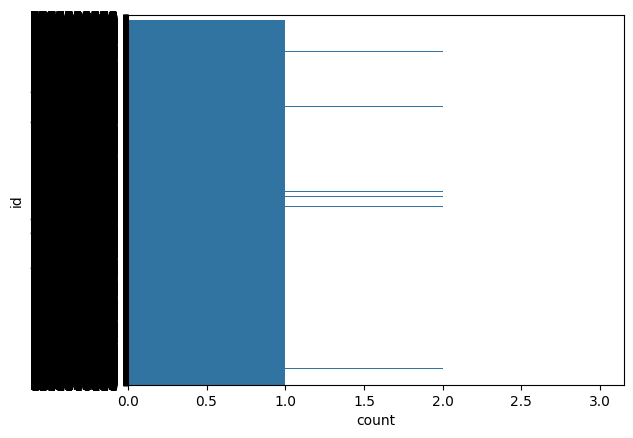

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64


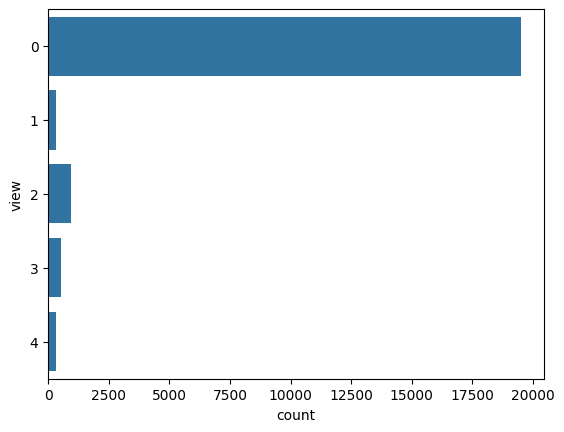

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64


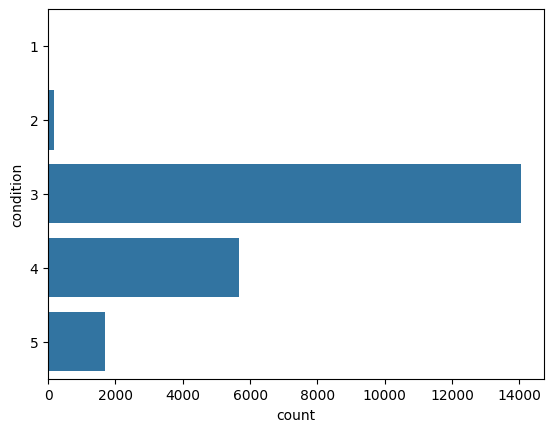

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64


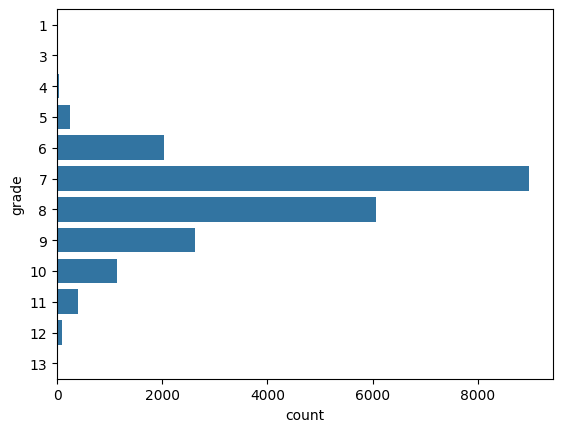

zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: count, Length: 70, dtype: int64


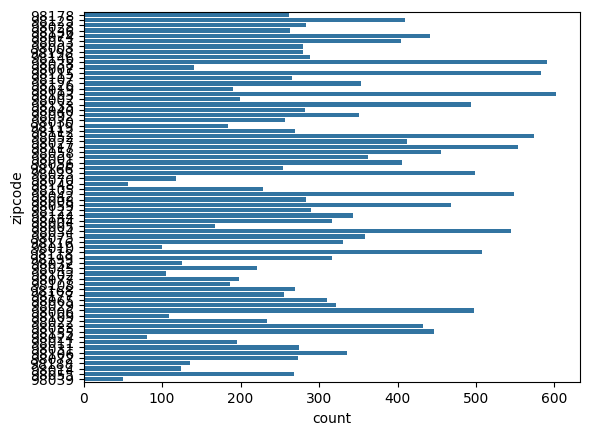

In [ ]:
# 1. Variables catégoriques :

# Distribution des catégories :

for col in df.select_dtypes(include=['object', 'category']):
    print(df[col].value_counts())
    sns.countplot(y=col, data=df)
    plt.show()

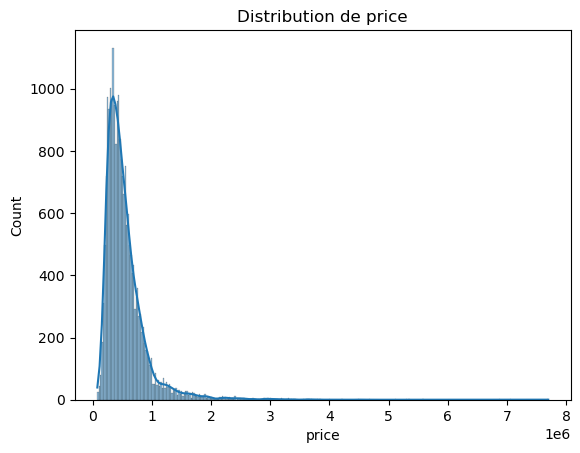

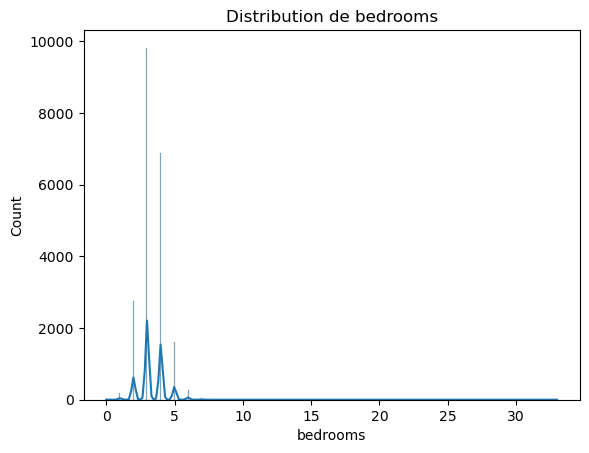

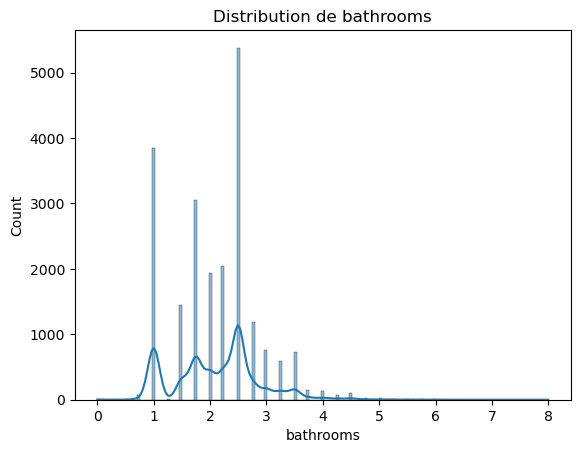

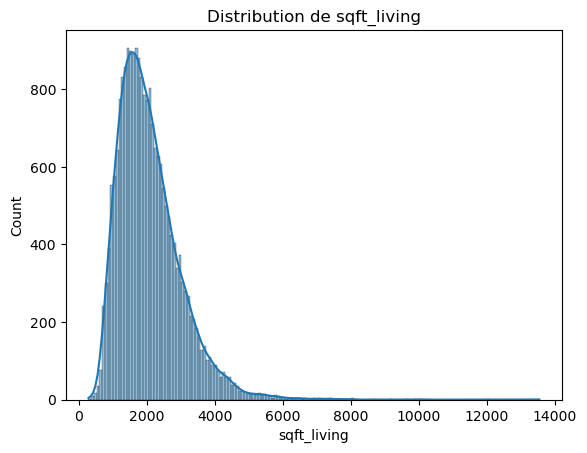

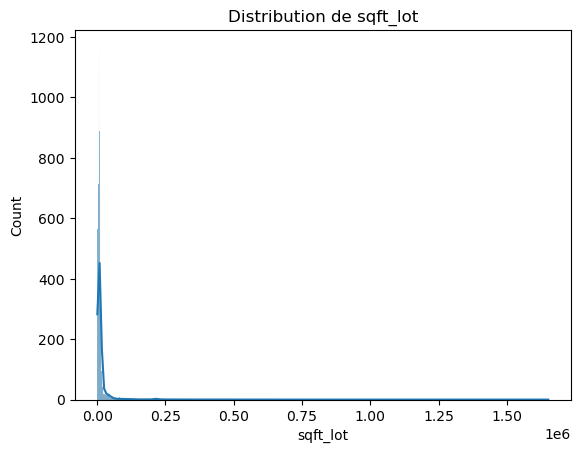

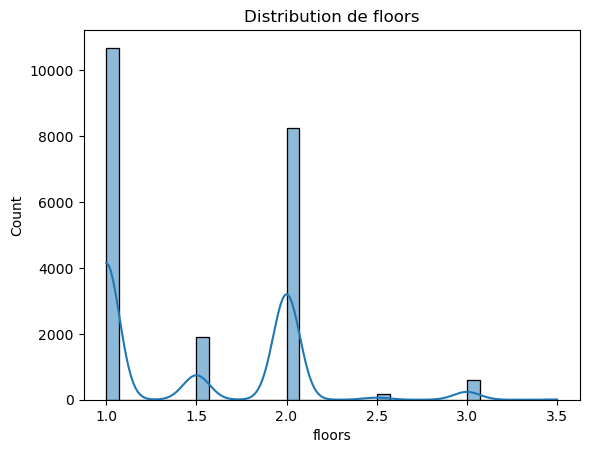

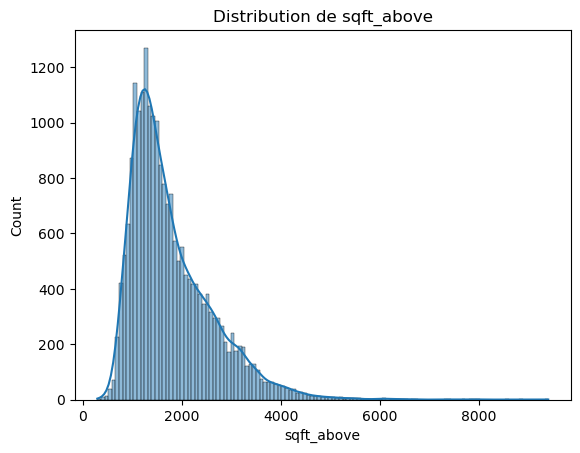

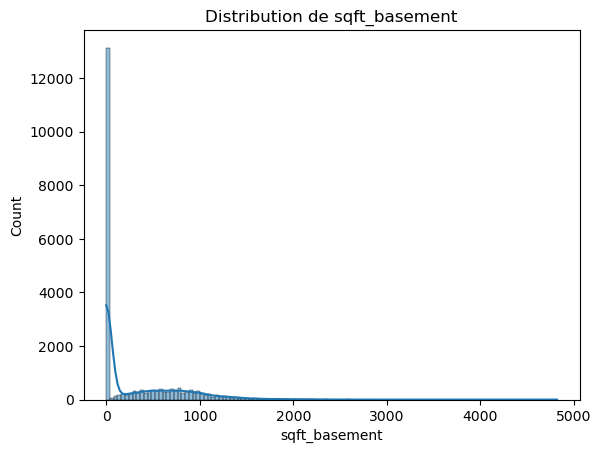

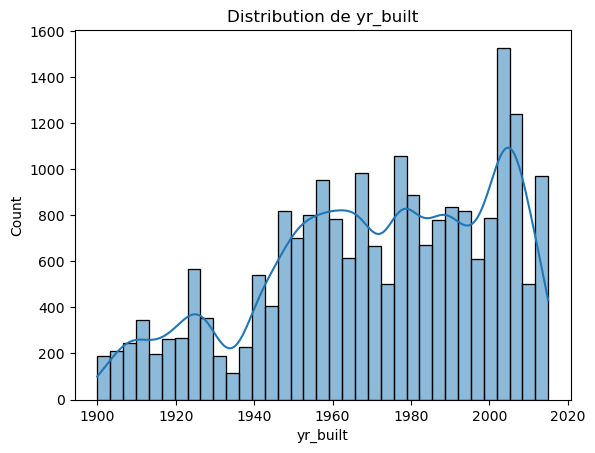

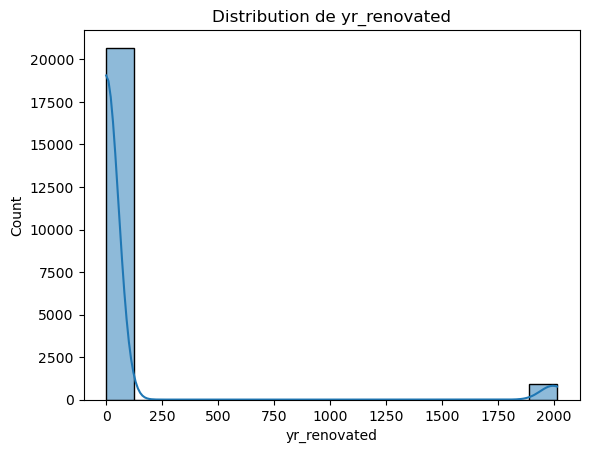

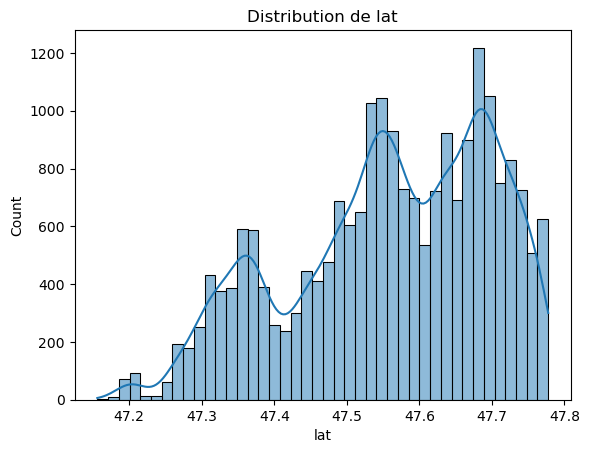

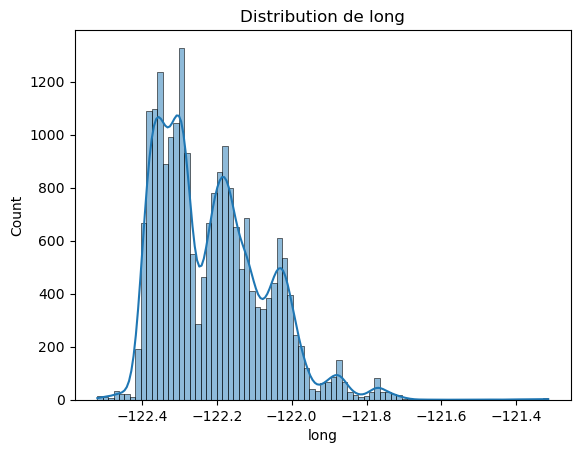

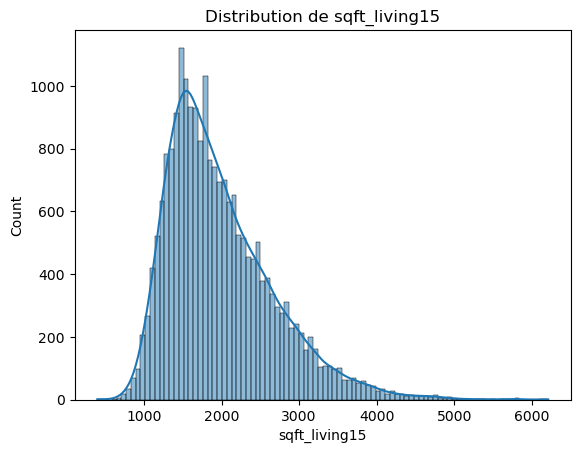

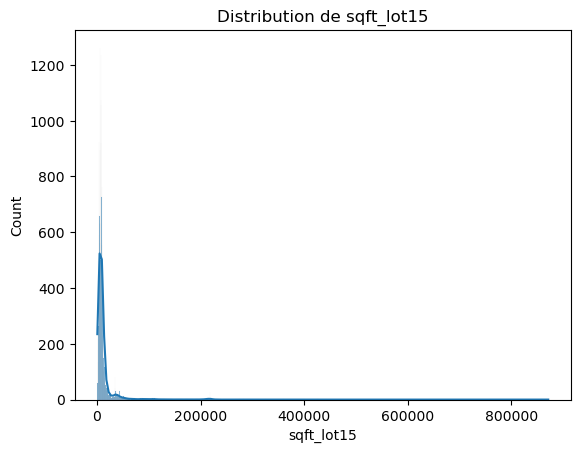

In [ ]:
# 2. Variables numériques :

# Statistiques de base et distribution :

for col in df.select_dtypes(include=['int64', 'float64']):
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()


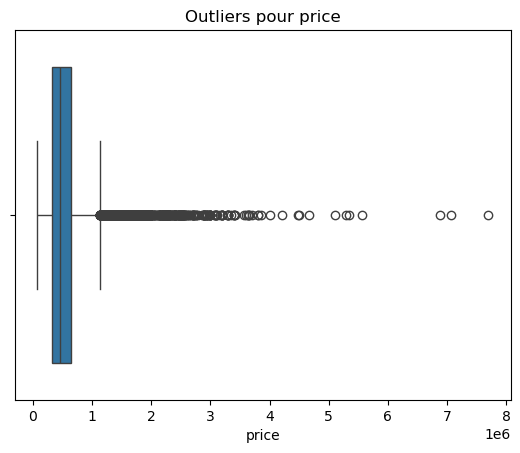

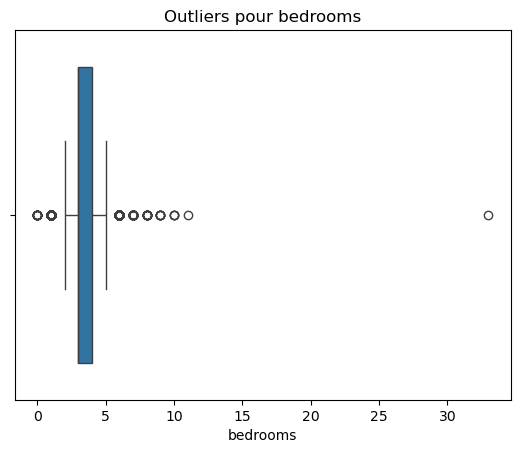

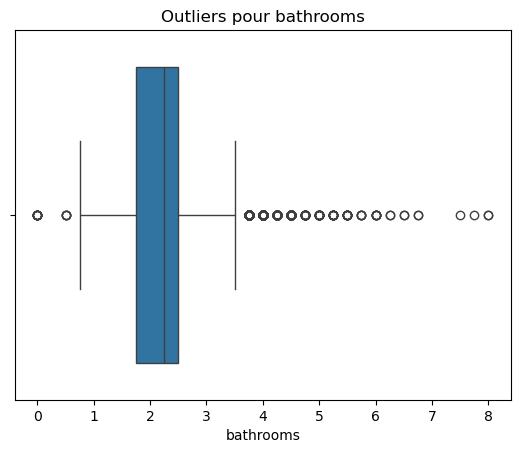

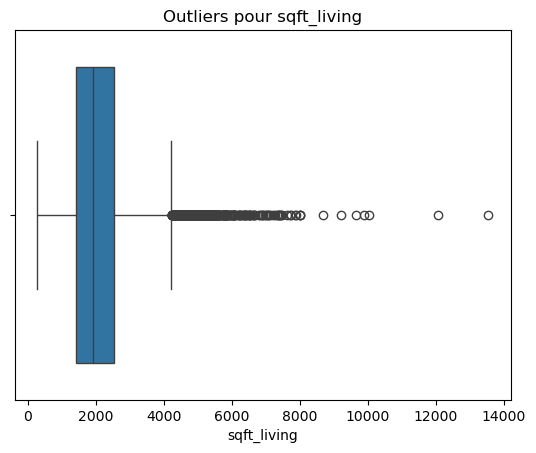

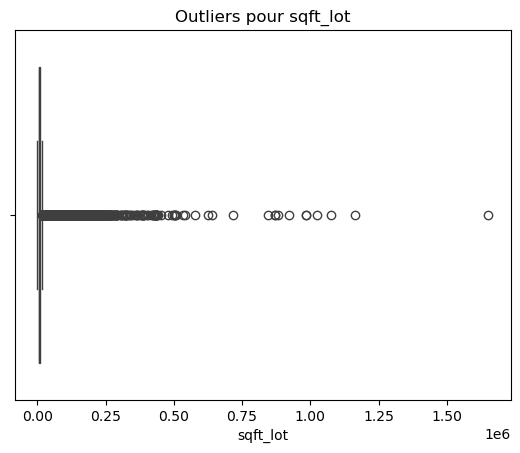

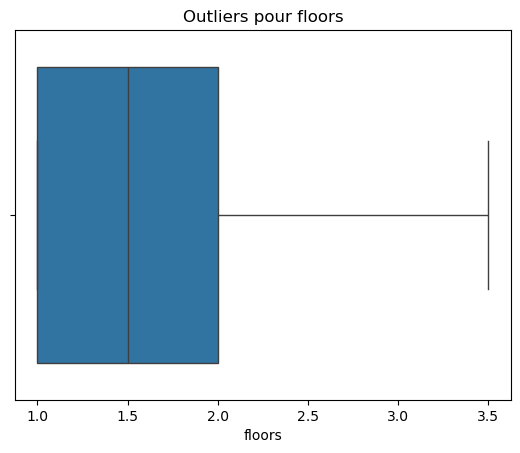

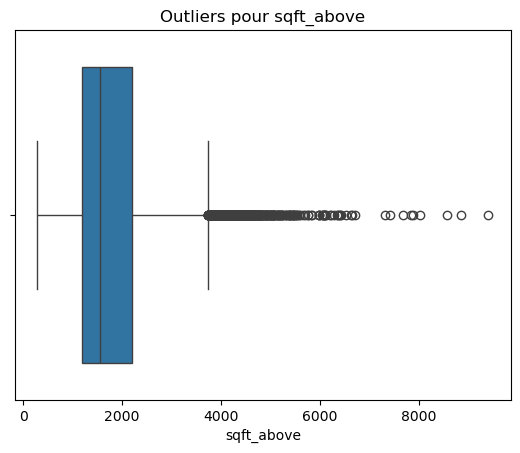

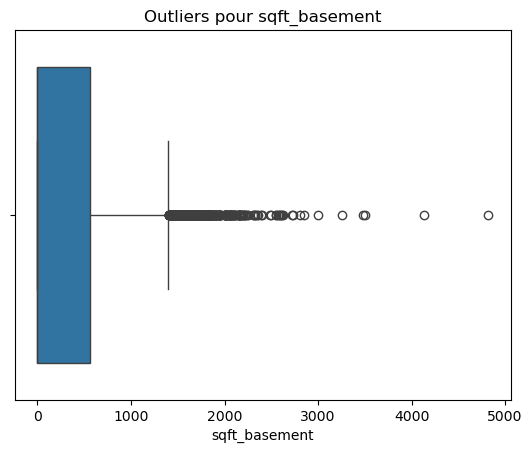

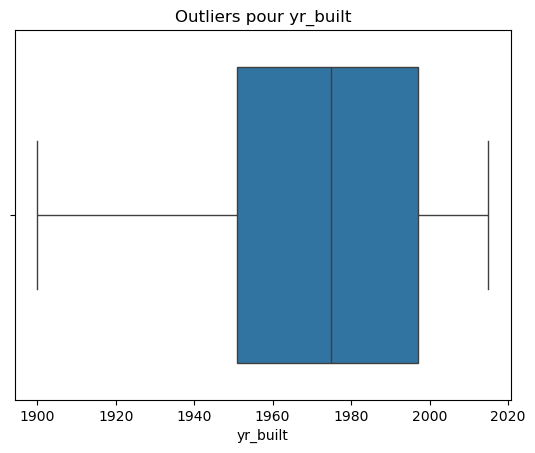

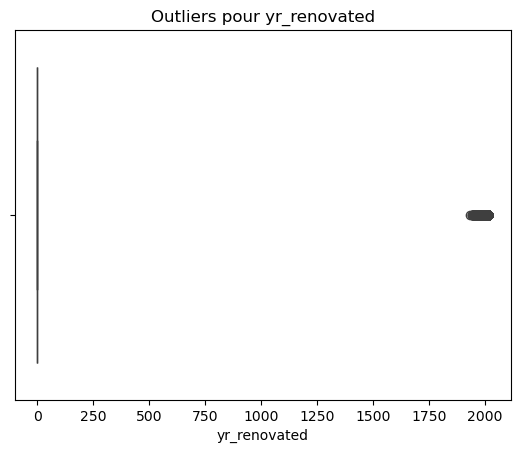

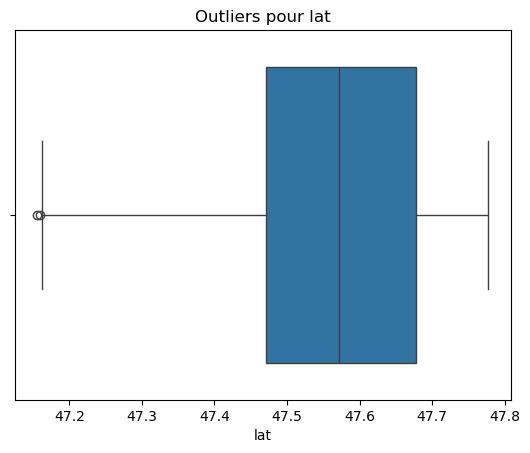

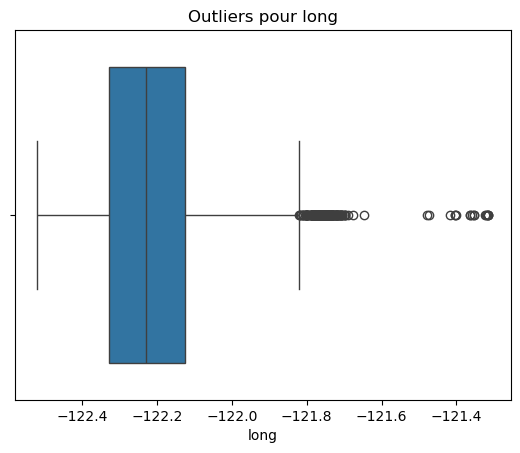

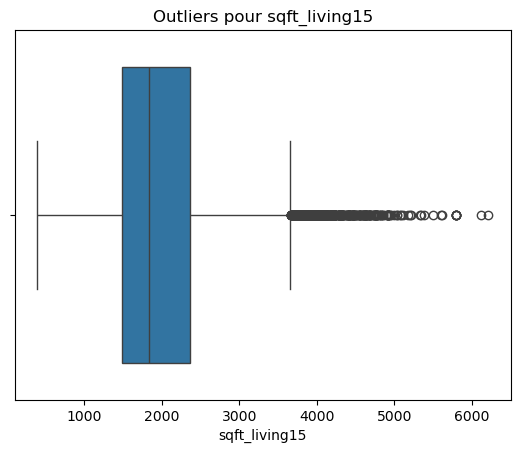

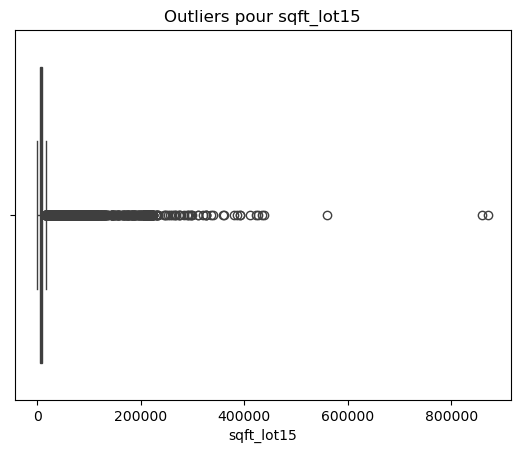

In [ ]:
# Boxplots pour détecter les outliers :

for col in df.select_dtypes(include=['int64', 'float64']):
    sns.boxplot(x=df[col])
    plt.title(f"Outliers pour {col}")
    plt.show()


# Étape 4 : Analyse des Relations

                     id  date     price  bedrooms  bathrooms  sqft_living  \
id             1.000000   NaN -0.016826  0.001286   0.005160    -0.012258   
date                NaN   NaN       NaN       NaN        NaN          NaN   
price         -0.016826   NaN  1.000000  0.308330   0.525168     0.702040   
bedrooms       0.001286   NaN  0.308330  1.000000   0.515884     0.576671   
bathrooms      0.005160   NaN  0.525168  0.515884   1.000000     0.754665   
sqft_living   -0.012258   NaN  0.702040  0.576671   0.754665     1.000000   
sqft_lot      -0.132109   NaN  0.089639  0.031703   0.087740     0.172826   
floors         0.018525   NaN  0.256894  0.175429   0.500653     0.353949   
waterfront    -0.002721   NaN  0.266367 -0.006582   0.063744     0.103818   
view           0.011592   NaN  0.397280  0.079532   0.187737     0.284611   
condition     -0.023783   NaN  0.036314  0.028472  -0.124982    -0.058753   
grade          0.008130   NaN  0.667444  0.356967   0.664983     0.762704   

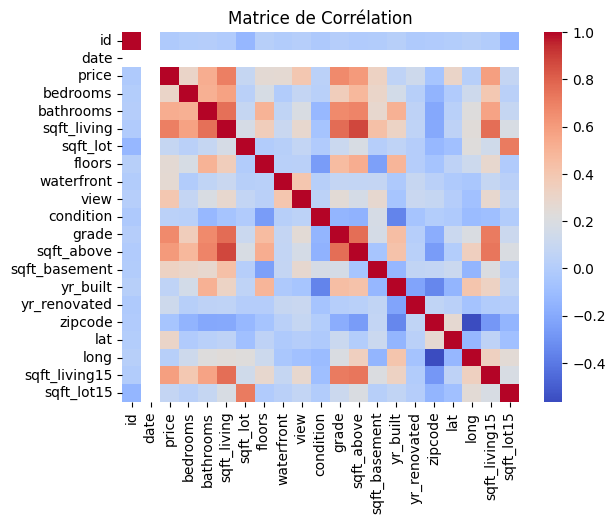

In [ ]:
# 1. Corrélation entre variables numériques :
# Matrice de corrélation :

correlation_matrix = df.corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.title("Matrice de Corrélation")
plt.show()


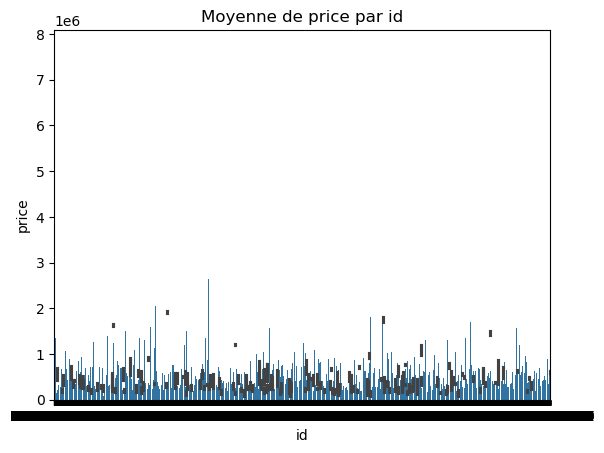

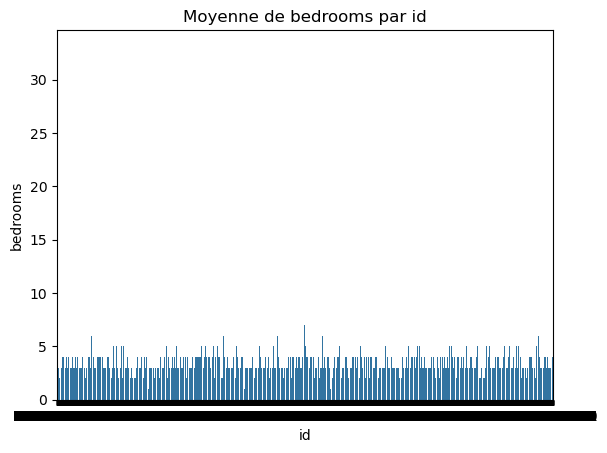

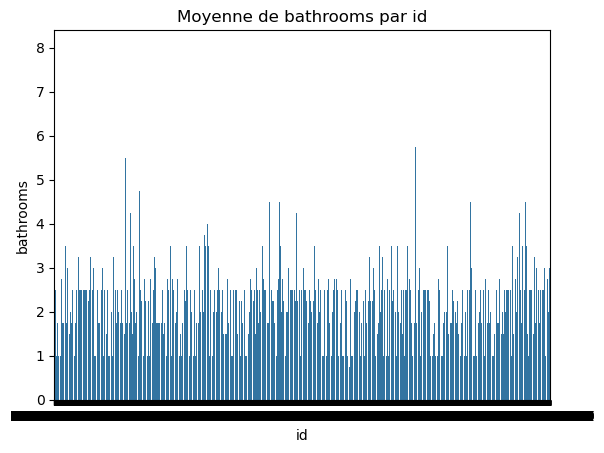

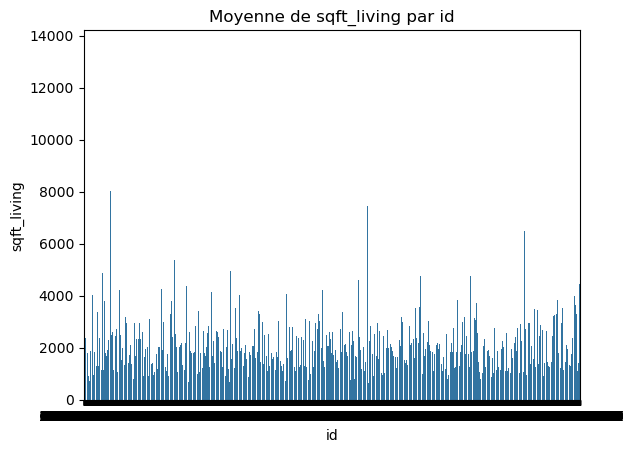

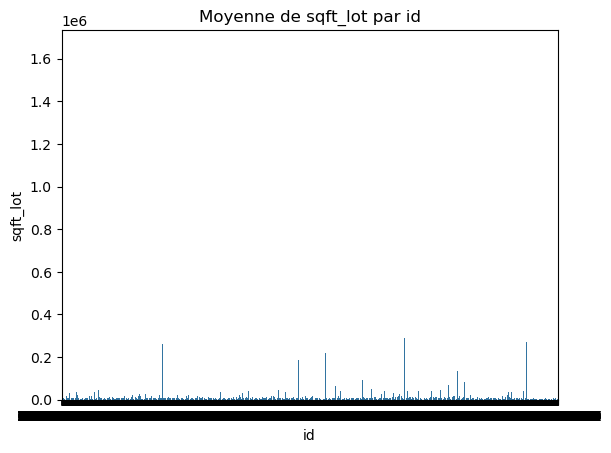

KeyboardInterrupt: 

In [ ]:
# 2. Relation entre variables numériques et catégoriques :

# Visualisation des moyennes par catégorie :

for col_cat in df.select_dtypes(include=['object', 'category']):
    for col_num in df.select_dtypes(include=['int64', 'float64']):
        sns.barplot(x=col_cat, y=col_num, data=df)
        plt.title(f"Moyenne de {col_num} par {col_cat}")
        plt.show()



In [ ]:
# Scatterplots pour observer les tendances : (A FINIR)

sns.scatterplot(x="var1", y="var2", hue="colonne_catégorique", data=df)
plt.show()


# Étape 5 : Gestion des Anomalies

In [ ]:
# 1. Traitement des valeurs manquantes :
# Vérifier les valeurs manquantes
# Supprimer ou imputer selon la situation :

# data['colonne'] = data['colonne'].fillna(data['colonne'].median())  # Exemple : Remplir avec la médiane

# 2. Traitement des outliers :
# Suppression des valeurs aberrantes :

# Q1 = data['colonne'].quantile(0.25)
# Q3 = data['colonne'].quantile(0.75)
# IQR = Q3 - Q1
# data = data[~((data['colonne'] < (Q1 - 1.5 * IQR)) | (data['colonne'] > (Q3 + 1.5 * IQR)))]

# Étape 6 : Régréssion linéaire multiple

In [ ]:
# MODELE 0

# 1. Choix des colonnes X pour la regression linéaire multiple :
# Extraire dynamiquement les noms des colonnes de type int, float et category
# et exclure les colonnes gênantes

columns_X0 = df.select_dtypes(include=['int64', 'float64','category']).columns.difference(['price','id','date']).tolist()

# Sélection des variables indépendantes (sans les valeurs manquantes)
df_train0 = df[df['price'].notna()]

X0 = df_train0[columns_X0]
y0 = df_train0['price']

print("Colonnes utilisées pour X :", columns_X0)

Colonnes utilisées pour X : ['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'lat', 'long', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'view', 'yr_built', 'yr_renovated']


In [ ]:
# MODELE 1
# 1. Choix des colonnes selon valeur du coefficient de correlation

# Récupérer les corrélations avec la colonne 'price'
correlations_with_price1 = correlation_matrix['price']

# Filtrer les colonnes avec un coefficient de corrélation entre 0.5 et 1 ou entre -1 et -0.5
columns_with_correlation1 = correlations_with_price1[(correlations_with_price1 > 0.6) | (correlations_with_price1 < -0.6)].index.tolist()

# 2. Choix des colonnes X pour la regression linéaire multiple :

columns_X1 = df[columns_with_correlation1].columns

# Retirer la colonne 'price'
columns_X1 = [col for col in columns_X1 if col != 'price']

# Sélection des variables indépendantes (sans les valeurs manquantes)
df_train1 = df[df['price'].notna()]

X1 = df_train1[columns_X1]
y1 = df_train1['price']

print("Colonnes utilisées pour X :", columns_X1)

Colonnes utilisées pour X : ['sqft_living', 'grade', 'sqft_above']


In [ ]:
# MODELE 2

# Récupérer les corrélations avec la colonne 'price'
correlations_with_price2 = correlation_matrix['price']

# Filtrer les colonnes avec un coefficient de corrélation entre 0.5 et 1 ou entre -1 et -0.5
columns_with_correlation2 = correlations_with_price2[(correlations_with_price2 > 0.2) | (correlations_with_price2 < -0.2)].index.tolist()

# 2. Choix des colonnes X pour la regression linéaire multiple :

columns_X2 = df[columns_with_correlation2].columns

# Retirer la colonne 'price'
columns_X2 = [col for col in columns_X2 if col != 'price']

# Sélection des variables indépendantes (sans les valeurs manquantes)
df_train2 = df[df['price'].notna()]

X2 = df_train2[columns_X2]
y2 = df_train2['price']

print("Colonnes utilisées pour X :", columns_X2)

Colonnes utilisées pour X : ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']


## Entrainement des modèles

In [ ]:
# MODELE 0

# 1. Entrainer le modèle

model0 = LinearRegression().fit(X0, y0)

print("Coefficients :", model0.coef_)

# 2. Afficher les coefficients

for i, j in zip (X0.columns, model0.coef_):
  print(i,j)

# 3. Faire des prédictions

df_predict0 = df[df['price'].isna()]
predict0 = model0.predict(df_predict0[columns_X0])
print(f"Prédictions : {predict0}")

# 4. Score du modèle

print(f"Score du modèle : {model0.score(X0,y0)}")

Coefficients : [ 4.17693322e+04 -3.69624819e+04  3.19885307e+04  9.26695558e+02
  9.54856088e+04  5.56694794e+05 -1.22237549e+05  7.44953005e+01
  3.61642275e+01  1.10659528e+02  2.42894173e+01  9.94682861e-02
 -3.64898845e-01  7.64791962e+04 -2.42293081e+03  2.84413240e+01]
bathrooms 41769.33219273066
bedrooms -36962.48185973504
condition 31988.53070220123
floors 926.6955582148023
grade 95485.608843015
lat 556694.7936646345
long -122237.54913468112
sqft_above 74.49530049150962
sqft_basement 36.16422751188975
sqft_living 110.65952751536042
sqft_living15 24.289417344343747
sqft_lot 0.0994682860764442
sqft_lot15 -0.36489884506590897
view 76479.1961558361
yr_built -2422.9308106626854
yr_renovated 28.441324049628236
Prédictions : [470262.4698104  169541.37260102 369043.47879109 172007.22491249]
Score du modèle : 0.6794830114223676


In [ ]:
# MODELE 1

# 1. Entrainer le modèle

model1 = LinearRegression().fit(X1, y1)

print("Coefficients :", model1.coef_)

# 2. Afficher les coefficients

for i, j in zip (X1.columns, model1.coef_):
  print(i,j)

# 3. Faire des prédictions

df_predict1 = df[df['price'].isna()]
predict1 = model1.predict(df_predict1[columns_X1])
print(f"Prédictions : {predict1}")

# 4. Score du modèle

print(f"Score du modèle : {model1.score(X1,y1)}")

Coefficients : [ 2.34674649e+02  1.09984371e+05 -7.76872740e+01]
sqft_living 234.67464889704047
grade 109984.37113275348
sqft_above -77.68727401946671
Prédictions : [591307.72698763 278809.64226281 479846.69082456 278809.64226281]
Score du modèle : 0.5410609414941435


In [ ]:
# MODELE 2

# 1. Entrainer le modèle

model2 = LinearRegression().fit(X2, y2)

print("Coefficients :", model2.coef_)

# 2. Afficher les coefficients

for i, j in zip (X2.columns, model2.coef_):
  print(i,j)

# 3. Faire des prédictions

df_predict2 = df[df['price'].isna()]
predict2 = model2.predict(df_predict2[columns_X2])
print(f"Prédictions : {predict2}")

# 4. Score du modèle

print(f"Score du modèle : {model2.score(X2,y2)}")

Coefficients : [-2.58486793e+04 -3.44381353e+03  1.29392246e+02 -2.93707958e+04
  6.02168187e+05  6.70518256e+04  8.21650199e+04  6.49438353e+01
  6.44484103e+01  6.73017705e+05  4.31400778e+00]
bedrooms -25848.679251472906
bathrooms -3443.813531916456
sqft_living 129.39224554788007
floors -29370.79578794268
waterfront 602168.1866090689
view 67051.82560260624
grade 82165.01987816679
sqft_above 64.94383525087642
sqft_basement 64.44841031605131
lat 673017.705238182
sqft_living15 4.314007780953943
Prédictions : [526559.52155198 304262.22525308 428635.521553   304060.3199415 ]
Score du modèle : 0.6577120322964236


In [ ]:
print(f"{predict0}, {model0.score(X0,y0)}")
print(f"{predict1}, {model1.score(X1,y1)}")
print(f"{predict2}, {model2.score(X2,y2)}")

[470262.4698104  169541.37260102 369043.47879109 172007.22491249], 0.6794830114223676
[591307.72698763 278809.64226281 479846.69082456 278809.64226281], 0.5410609414941435
[526559.52155198 304262.22525308 428635.521553   304060.3199415 ], 0.6577120322964236
